In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
def date_parse(time_in_secs):
    return dt.datetime.fromtimestamp(float(time_in_secs))

In [3]:
df = pd.read_csv('data/controller.csv',
                 parse_dates=True,
                 date_parser=date_parse,
                 index_col='timestamp')
df.head()

,measurement,temperature,temperature variance,temperature change,temperature change variance,set point,hysteresis,heat,cool
timestamp,,,,,,,,,
2020-05-14 23:27:35.305481,18.25,18.25,0.003906,0.000002,7.567073e-10,18.0,0.1,False,True
2020-05-14 23:27:36.187495,18.25,18.25,0.001953,0.000002,7.850378e-08,18.0,0.1,False,True
2020-05-14 23:27:37.067458,18.25,18.25,0.001302,0.000002,1.559397e-07,18.0,0.1,False,True
2020-05-14 23:27:37.947317,18.25,18.25,0.000977,0.000002,2.333289e-07,18.0,0.1,False,True
2020-05-14 23:27:38.826545,18.25,18.25,0.000781,0.000002,3.106153e-07,18.0,0.1,False,True


In [28]:
df['heat'] = df['heat'].astype(int)
df['cool'] = df['cool'].astype(int)
df['set point + hysteresis'] = df['set point'] + df['hysteresis']
df['set point - hysteresis'] = df['set point'] - df['hysteresis']
df.head()

,measurement,temperature,temperature variance,temperature change,temperature change variance,set point,hysteresis,heat,cool,set point + hysteresis,set point - hysteresis,temperature + variance,temperature - variance
timestamp,,,,,,,,,,,,,
2020-05-14 23:27:35.305481,18.25,18.25,0.003906,0.000002,7.567073e-10,18.0,0.1,0,1,18.1,17.9,18.261719,18.238281
2020-05-14 23:27:36.187495,18.25,18.25,0.001953,0.000002,7.850378e-08,18.0,0.1,0,1,18.1,17.9,18.255859,18.244141
2020-05-14 23:27:37.067458,18.25,18.25,0.001302,0.000002,1.559397e-07,18.0,0.1,0,1,18.1,17.9,18.253906,18.246094
2020-05-14 23:27:37.947317,18.25,18.25,0.000977,0.000002,2.333289e-07,18.0,0.1,0,1,18.1,17.9,18.252930,18.247070
2020-05-14 23:27:38.826545,18.25,18.25,0.000781,0.000002,3.106153e-07,18.0,0.1,0,1,18.1,17.9,18.252344,18.247656


In [8]:
# Filter outliers/invalid readings
df = df[df['measurement'].between(-5.0,20.0)]

In [33]:
def plot(df):
    fig = plt.figure(figsize=(12,8))
    temperature_plt = plt.subplot2grid((4,1),(1,0), rowspan=3)
    control_plt = plt.subplot2grid((4,1),(0,0), sharex=temperature_plt)

    temperature_plt.plot(df.index.values,df['temperature'].values)
    temperature_plt.plot(df.index.values,df['set point'].values)
    temperature_plt.plot(df.index.values,df['set point + hysteresis'].values)
    temperature_plt.plot(df.index.values,df['set point - hysteresis'].values)
    temperature_plt.scatter(df.index.values, df['measurement'].values,alpha=0.5,color='k',marker='x')

    control_plt.plot(df['heat'])
    control_plt.plot(df['cool'])

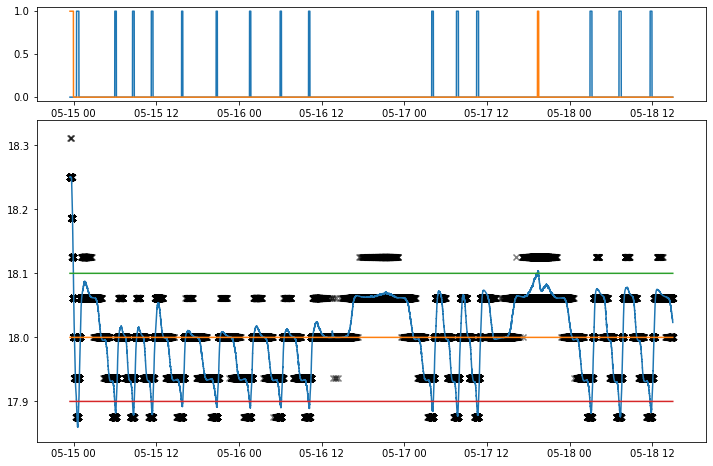

In [34]:
plot(df)

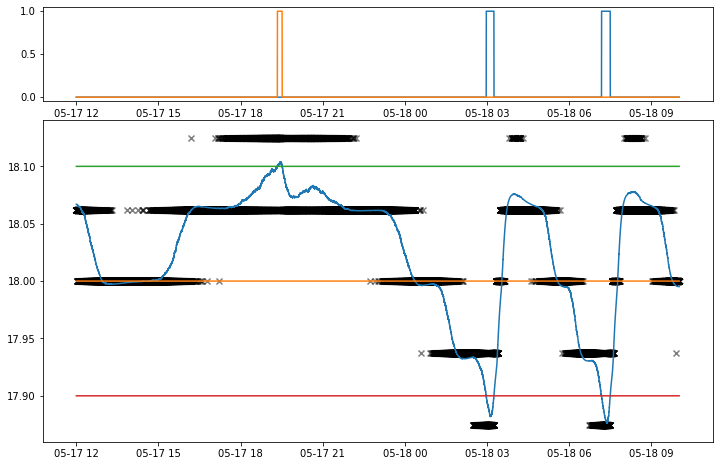

In [35]:
plot(df.loc['2020-05-17 12:00':'2020-05-18 10:00'])

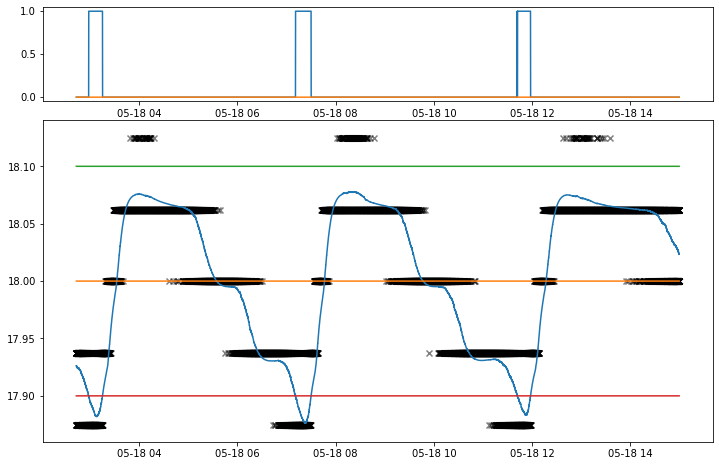

In [36]:
plot(df.tail(50000))